First 5 rows of data:
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


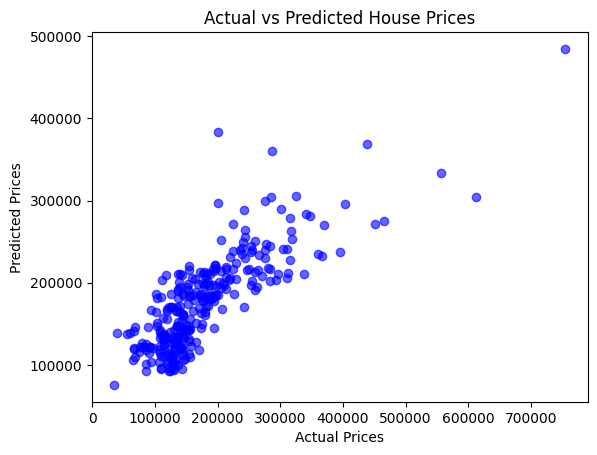

In [1]:
# Task-01: House Price Prediction using Linear Regression
# Dataset: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# ---------------------------
# Step 1: Load the dataset
# ---------------------------
data = pd.read_csv("train.csv")
print("First 5 rows of data:")
print(data.head())

# ---------------------------
# Step 2: Select useful features
# ---------------------------
features = data[['GrLivArea', 'BedroomAbvGr', 'FullBath']]
target = data['SalePrice']

# ---------------------------
# Step 3: Split into Train and Test
# ---------------------------
X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.2, random_state=42
)

# ---------------------------
# Step 4: Train the model
# ---------------------------
model = LinearRegression()
model.fit(X_train, y_train)

# ---------------------------
# Step 5: Predict on test data
# ---------------------------
y_pred = model.predict(X_test)

# ---------------------------
# Step 6: Evaluate the model
# ---------------------------
print("\nModel Evaluation:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

# ---------------------------
# Step 7: Example Prediction
# ---------------------------
# Example: 2000 sqft, 3 bedrooms, 2 bathrooms
new_house = np.array([[2000, 3, 2]])
predicted_price = model.predict(new_house)
print("\nPredicted House Price for 2000 sqft, 3 bed, 2 bath: $", round(predicted_price[0], 2))

# ---------------------------
# Step 8: Visualization
# ---------------------------
plt.scatter(y_test, y_pred, alpha=0.6, color="blue")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()
